In [ ]:
import timeit
import numpy as np
from qcsim.misc import linear_entanglement_circuit
from qcsim import Simulator

sim = Simulator()

num_qubits = (2, 4, 6, 8, 9, 10, 11, 12, 13)
mean_runtimes = []
std_runtimes = []

for nq in num_qubits:
    circuit = linear_entanglement_circuit(num_qubits=nq)
    runtimes = timeit.repeat(
        'sim.run(circuit)', globals=globals(), number=1, repeat=10)
    mean_runtimes.append(np.mean(runtimes))
    std_runtimes.append(np.std(runtimes))

mean_runtimes = np.array(mean_runtimes)
std_runtimes = np.array(std_runtimes)

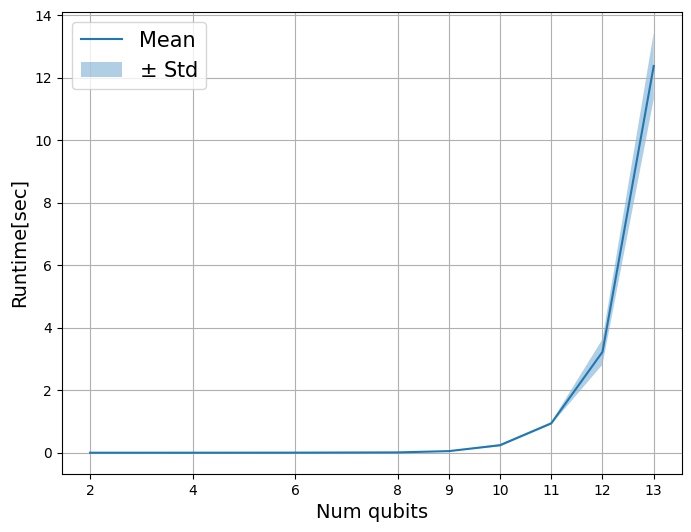

In [ ]:
import pylab as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_qubits, mean_runtimes, label='Mean')
y1 = mean_runtimes - std_runtimes
y2 = mean_runtimes + std_runtimes
ax.fill_between(num_qubits, y1=y1, y2=y2, alpha=0.35, label='$\\pm$ Std')
ax.set_xticks(num_qubits)
ax.set_xlabel('Num qubits', fontsize=14)
ax.set_ylabel('Runtime[sec]', fontsize=14)
ax.legend(fontsize=15)
ax.grid()

plt.show()